<a href="https://colab.research.google.com/github/SenaKymk/naive_bayes_YZM212_lab/blob/main/gaussianNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Algoritmasının Scikit-Learn kütüphanesi ile kullanılması

Bu notebook, **Scikit-Learn kütüphanesi kullanarak** Gaussian Naive Bayes algoritmasını  uygulamak için hazırlanmıştır.

📌 **Adımlar:**
1. **Naive Bayes Classı Algoritmasını Scitlearn ile Yazma**
2. **Veri Setini Yükleme**
3. **Veriyi Eğitim ve Test Setlerine Ayırma**
4. **Modeli Eğitme ve Tahmin Yapma** 📊
5. **Modelin Performansını Değerlendirme** ✅



In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# veriyi içe aktarılır
veri = pd.read_csv("/content/diabetes_veri_temiz.csv")
#verinin ilk 5 satırını gösterir
veri.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0
2,8,183,23.3,0.672,32,1
3,1,89,28.1,0.167,21,0
4,0,137,43.1,2.288,33,1


In [5]:
# Hedef değişkeni belirle
X = veri.drop(columns=["Outcome"])  # Bağımsız değişkenler
y = veri["Outcome"]  # Bağımlı değişken (1: Diyabet var, 0: Yok)

# %80 eğitim, %20 test olacak şekilde ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Modeli oluştur
gnb = GaussianNB()


In [7]:
# Eğitim süresini ölç
start_time = time.time()
gnb.fit(X_train, y_train)
train_time = time.time() - start_time


In [8]:
# Test süresini ölç
start_time = time.time()
y_pred = gnb.predict(X_test)
test_time = time.time() - start_time


In [9]:
# Performans değerlendirmesi
print("Karmaşıklık Matrisi:\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


Karmaşıklık Matrisi:
 [[79 20]
 [18 37]]

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



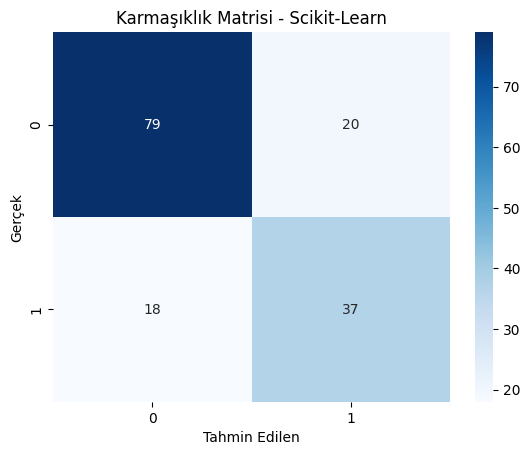

Eğitim süresi: 0.0136 saniye
Test süresi: 0.0031 saniye


In [10]:
# Görselleştirme
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Karmaşıklık Matrisi - Scikit-Learn")
plt.show()

print(f"Eğitim süresi: {train_time:.4f} saniye")
print(f"Test süresi: {test_time:.4f} saniye")
